#Part 0 - Installation

In [1]:
!pip install tensorflow==1.15.0
!pip install keras==2.1.4

     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 512kB 52.6MB/s 
     |████████████████████████████████| 3.8MB 48.3MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=aadaccde2232ec6c13247b2274ef21ac8f61941866954c71328df096798fb97d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

#Part 1 : Building a CNN

In [2]:


#import Keras packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np

Using TensorFlow backend.


In [3]:
# Initializing the CNN
np.random.seed(1337)
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu")`
  """


In [4]:
#hidden layer
classifier.add(Dense(output_dim = 1024, activation = 'relu'))
classifier.add(Dense(output_dim = 1024, activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
#output layer
classifier.add(Dense(output_dim = 2, activation = 'softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`
  


In [6]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              130057216 
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 131,109,762
Trainable params: 131,109,762
Non-trainable params: 0
____________________________________________________________

#Part 2 - Fitting the data set

In [7]:
!unzip "/content/data.zip"

Archive:  /content/data.zip
   creating: data/
   creating: data/train/
   creating: data/train/cats/
  inflating: data/train/cats/cat.1.jpg  
  inflating: data/train/cats/cat.10.jpg  
  inflating: data/train/cats/cat.100.jpg  
  inflating: data/train/cats/cat.101.jpg  
  inflating: data/train/cats/cat.102.jpg  
  inflating: data/train/cats/cat.103.jpg  
  inflating: data/train/cats/cat.104.jpg  
  inflating: data/train/cats/cat.105.jpg  
  inflating: data/train/cats/cat.106.jpg  
  inflating: data/train/cats/cat.107.jpg  
  inflating: data/train/cats/cat.108.jpg  
  inflating: data/train/cats/cat.109.jpg  
  inflating: data/train/cats/cat.11.jpg  
  inflating: data/train/cats/cat.110.jpg  
  inflating: data/train/cats/cat.111.jpg  
  inflating: data/train/cats/cat.112.jpg  
  inflating: data/train/cats/cat.113.jpg  
  inflating: data/train/cats/cat.114.jpg  
  inflating: data/train/cats/cat.115.jpg  
  inflating: data/train/cats/cat.116.jpg  
  inflating: data/train/cats/cat.117.jpg  

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory(
        '/content/data/train',
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical' )
label_map = (training_set.class_indices)

test_set = test_datagen.flow_from_directory(
        '/content/data/val',
        target_size=(128, 128),
        batch_size=16,
        class_mode='categorical')

Found 360 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [29]:
history = classifier.fit_generator(
        training_set,
        steps_per_epoch=20,
        epochs=20,        
        validation_data=test_set,
        validation_steps=100)

Epoch 1/20
20/20 [==============================] - 53s 3s/step - loss: 7.9582 - acc: 0.5063 - val_loss: 8.0349 - val_acc: 0.5015
Epoch 2/20
20/20 [==============================] - 52s 3s/step - loss: 8.0566 - acc: 0.5002 - val_loss: 8.1073 - val_acc: 0.4970
Epoch 3/20
20/20 [==============================] - 53s 3s/step - loss: 8.2657 - acc: 0.4872 - val_loss: 8.0348 - val_acc: 0.5015
Epoch 4/20
20/20 [==============================] - 53s 3s/step - loss: 7.7568 - acc: 0.5188 - val_loss: 8.0229 - val_acc: 0.5022
Epoch 5/20
20/20 [==============================] - 52s 3s/step - loss: 8.1651 - acc: 0.4934 - val_loss: 8.1194 - val_acc: 0.4963
Epoch 6/20
20/20 [==============================] - 53s 3s/step - loss: 7.9583 - acc: 0.5062 - val_loss: 8.0348 - val_acc: 0.5015
Epoch 7/20
20/20 [==============================] - 52s 3s/step - loss: 8.2054 - acc: 0.4909 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/20
20/20 [==============================] - 52s 3s/step - loss: 7.8598 - acc: 0.51

In [30]:
history

#Part 3 - Save Model

In [31]:
import h5py

classifier.save('saved_model')
print('Saved trained model as %s ' % 'saved_model.h5')

Saved trained model as saved_model.h5 


#Part 4 - Visualization

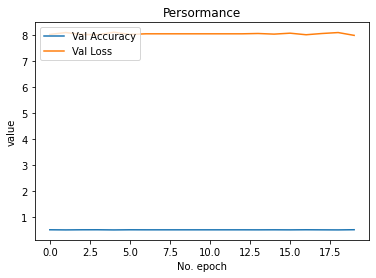

In [32]:
import matplotlib.pyplot as plt

# Plot history: MAE
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Persormance')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

#